In [1]:
import numpy as np
import matplotlib.pyplot as plt

from meccomp_lib import *

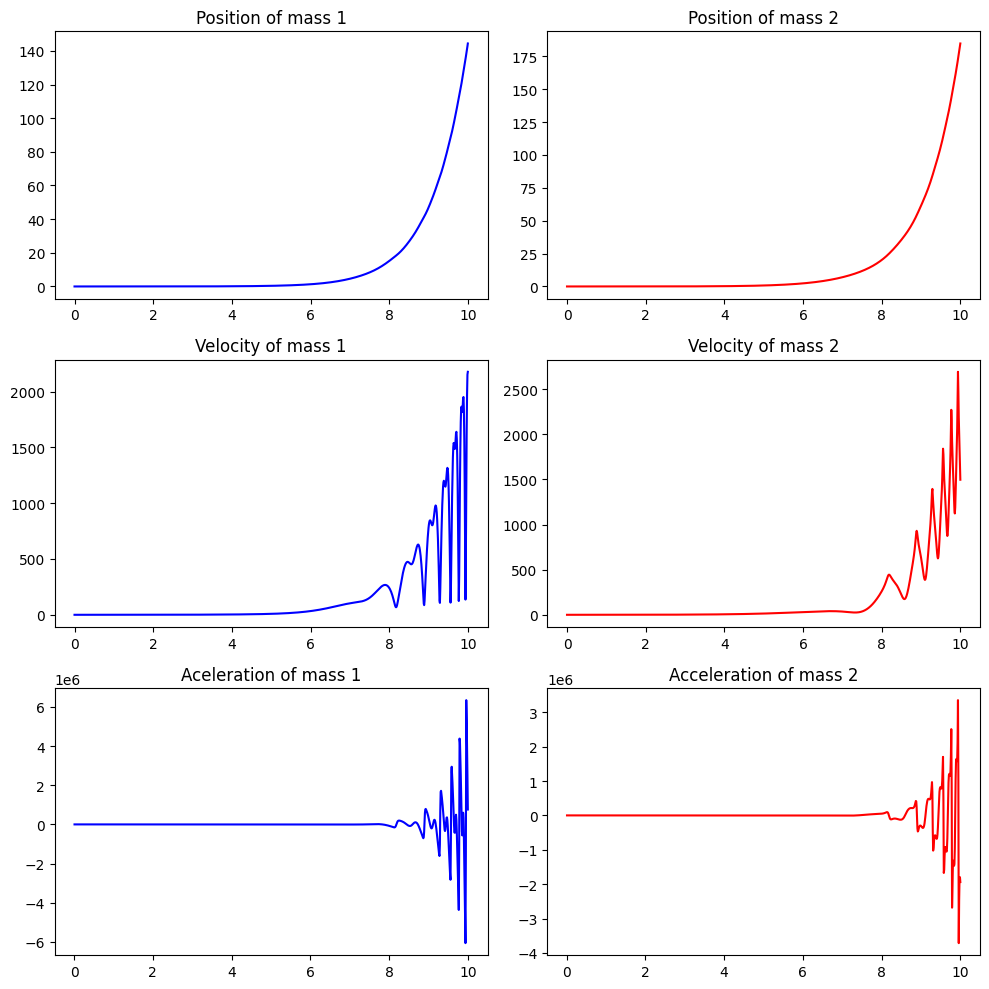

In [12]:


class RK4(BaseMethod):
    def __init__(self, step:float=0.01, simulation_time:float = 10):
        super().__init__(step=step, simulation_time=simulation_time)
       
    def apply_f(self, state):
        theta_1 = state[0]
        theta_1_dot = state[1]
        theta_2 = state[3]
        theta_2_dot = state[4]
        state_kwargs ={
            'theta_1' : theta_1,
            'theta_1_dot' : theta_1_dot,
            'theta_2' : theta_2,
            'theta_2_dot' : theta_2_dot, 
        }
        
        next_theta_1 = theta_1 + self.step*theta_1_dot
        next_theta_1_dot_dot = self.system.theta_1_dot_dot(**state_kwargs)
        next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
        
        next_theta_2 = theta_2 + self.step*theta_2_dot
        next_theta_2_dot_dot = self.system.theta_2_dot_dot(**state_kwargs)
        next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
        
        next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                        next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
        
        #next_state = [0 if np.isnan(x) else x for x in next_state]
        #next_state = [0 if np.isinf(x) else x for x in next_state]
        
        #next_state = [round(value,4) for value in next_state]

        return next_state
        
        
    def simul(self):
        self.system.reset()
        for time_step in range(self.n_steps): 
            current_state = self.system.get_current_state()
            current_state = np.array(list(current_state.values()))
            
            k1 = self.apply_f(current_state)
            k1 = np.array(k1)
            
            k2_state = current_state + (self.step/2)*k1
            k2 = self.apply_f(k2_state)
            k2 = np.array(k2)
            
            k3_state = current_state + (self.step/2)*k2
            k3 = self.apply_f(k3_state)
            k3 = np.array(k3)
            
            k4_state = current_state + (self.step)*k3
            k4 = self.apply_f(k4_state)
            
            next_state = current_state + (self.step/6)*(k1 + 2*k2 + 2*k3 + k4)
            next_state[2] = k1[2]
            next_state[5] = k1[5]
            
            self.system.insert_state(list(next_state))
            


rk = RK4(step=0.01, simulation_time=10)

rk.simul()

rk.plot_results()

In [6]:
# Python program to implement Runge Kutta method
# A sample differential equation "dy / dx = (x - y)/2"
def dydx(x, y):
    return ((x - y)/2)
 
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h):
    # Count number of iterations using step size or
    # step height h
    n = (int)((x - x0)/h) 
    # Iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)
 
        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        # Update next value of x
        x0 = x0 + h
    return y
 
# Driver method
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h))
 
# This code is contributed by Prateek Bhindwar

The value of y at x is: 1.1036393232374955


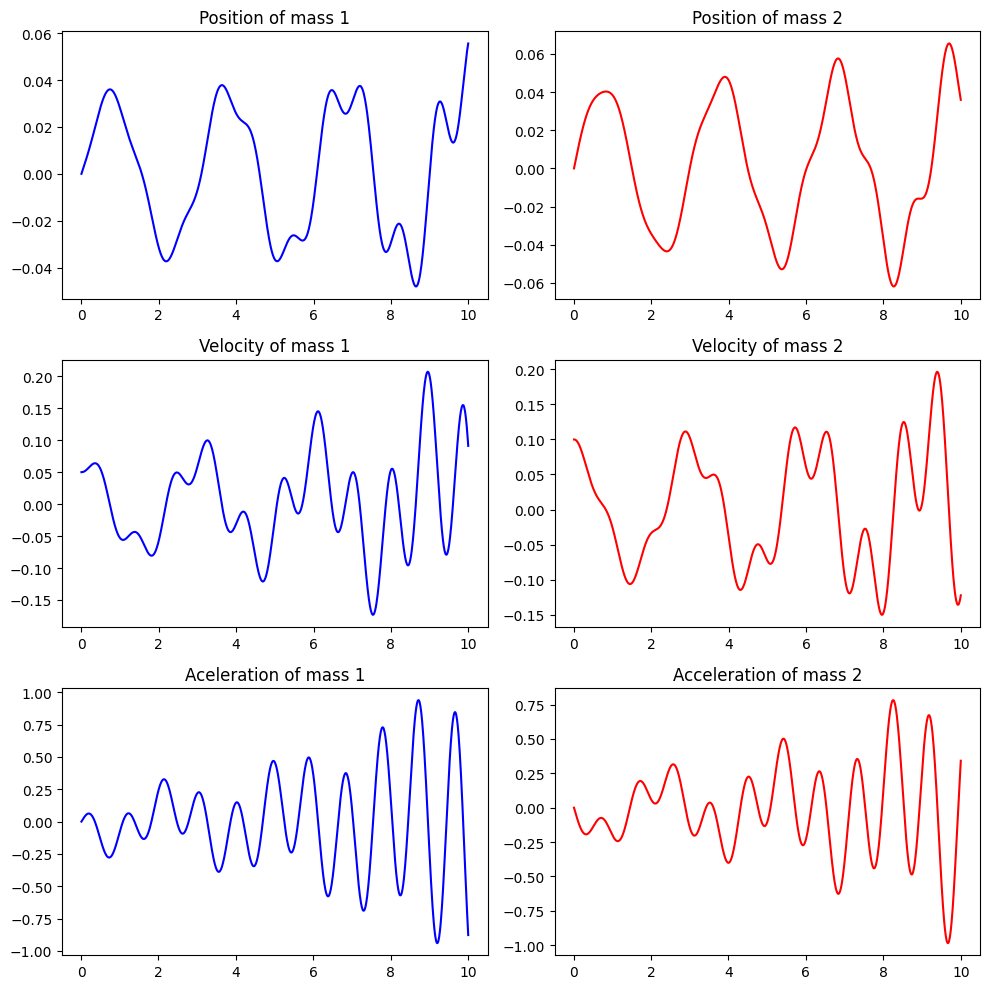

In [5]:
eu = Euler()

eu.simul()

eu.plot_results()